<a href="https://colab.research.google.com/github/swarnava-96/Digit-Recognition/blob/main/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Digit Recognition**
The goal of this project is to recognize digits using ANN on Keras MNIST dataset.

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [19]:
# Lets see the tensorflow version
import tensorflow
tensorflow.__version__

'2.16.1'

In [4]:
# Lets load the dataset
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
# Lets see the shape of the dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


5


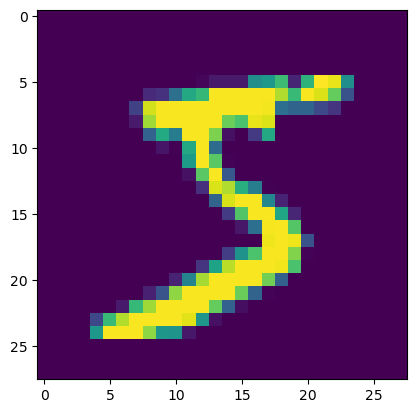

In [6]:
# Lets see an image from the dataset and the corresponding label
plt.imshow(X_train[0])
print(y_train[0]);

In [7]:
# Lets scale down the data
X_train = X_train/255
X_test = X_test/255

In [15]:
import warnings
warnings.filterwarnings('ignore')

# Model Building
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [16]:
# Lets see the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Lets compile the model
model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [18]:
# Model training
history = model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2, verbose = 1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8444 - loss: 0.5590 - val_accuracy: 0.9498 - val_loss: 0.1807
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9525 - loss: 0.1661 - val_accuracy: 0.9609 - val_loss: 0.1363
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9677 - loss: 0.1090 - val_accuracy: 0.9668 - val_loss: 0.1130
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9758 - loss: 0.0827 - val_accuracy: 0.9707 - val_loss: 0.0981
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9822 - loss: 0.0616 - val_accuracy: 0.9713 - val_loss: 0.0947
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9862 - loss: 0.0479 - val_accuracy: 0.9705 - val_loss: 0.0941
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9885 - loss: 0.0407 - val_accuracy: 0.9747 - val_loss: 0.0855
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9921 - loss: 0.0296 - val_accuracy: 0.

In [20]:
# Model evaluation
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0879


[0.07406451553106308, 0.9775999784469604]

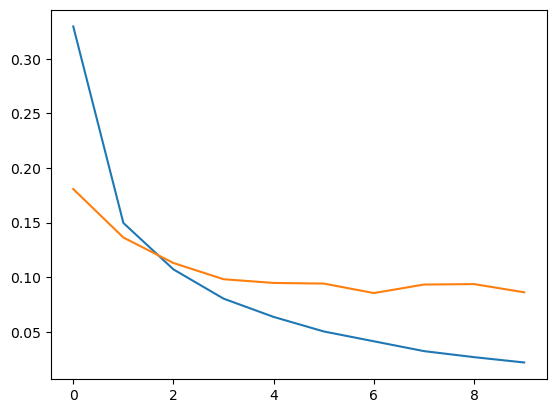

In [21]:
# Lets plot the losses
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"]);

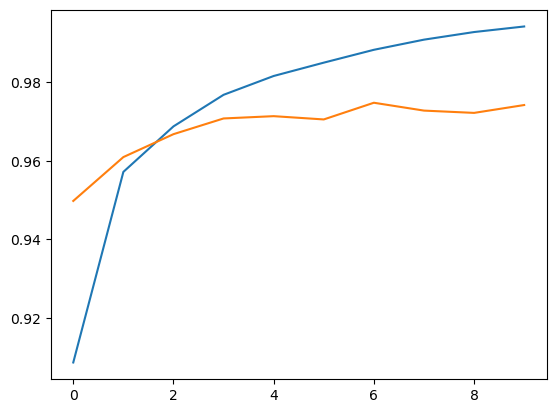

In [22]:
# Lets plot the accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"]);